# CART

In [1]:
!pip install skompiler

     |████████████████████████████████| 45 kB 1.1 MB/s eta 0:00:011
  Created wheel for skompiler: filename=SKompiler-0.7-py3-none-any.whl size=54311 sha256=e6b11143252fc4347d06fadebdf9c708b855f0a0e21f2e41133e8d8247ede19c
  Stored in directory: /home/suedagulgun/.cache/pip/wheels/eb/73/c6/cf0fc98d965e01e8bb3b1923d1e6a57374645d5d055f00e898
Successfully built skompiler


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot as plt
from skompiler import skompile

from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=42)


In [4]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

In [5]:
cart_model = DecisionTreeRegressor(min_samples_split = 2)

In [6]:
?cart_model

In [8]:
cart_model.fit(X_train, y_train)

DecisionTreeRegressor()

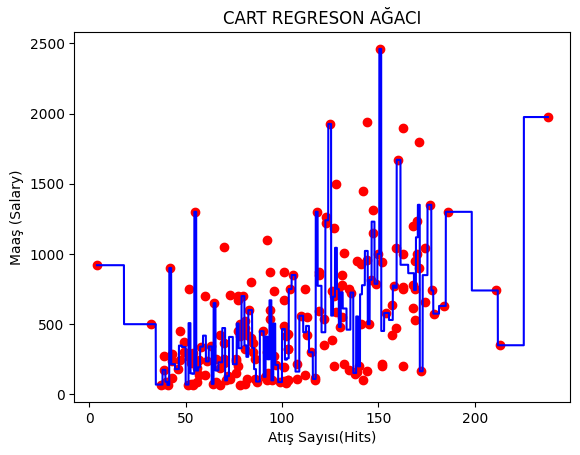

In [9]:
X_grid = np.arange(min(np.array(X_train)),max(np.array(X_train)), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_grid, cart_model.predict(X_grid), color = 'blue')
plt.title('CART REGRESON AĞACI')
plt.xlabel('Atış Sayısı(Hits)')
plt.ylabel('Maaş (Salary)') ;

In [11]:
print(skompile(cart_model.predict).to('python/code'))

((920.0 if x[0] <= 18.0 else ((500.0 if x[0] <= 34.5 else (70.0 if x[0] <= 
    38.0 else 175.0) if x[0] <= 39.5 else 90.0 if x[0] <= 40.5 else 67.5) if
    x[0] <= 41.5 else 900.0 if x[0] <= 42.5 else (((((215.55566666666667 if
    x[0] <= 44.5 else 180.0) if x[0] <= 46.5 else 347.5 if x[0] <= 48.0 else
    337.5) if x[0] <= 50.0 else 70.0) if x[0] <= 51.5 else 507.5) if x[0] <=
    52.5 else 150.0 if x[0] <= 53.5 else 146.83333333333334) if x[0] <= 
    54.5 else 1300.0 if x[0] <= 55.5 else (170.0 if x[0] <= 56.5 else 
    193.75) if x[0] <= 57.5 else ((((((340.0 if x[0] <= 59.0 else 418.5) if
    x[0] <= 60.5 else 235.0 if x[0] <= 62.0 else 341.667) if x[0] <= 63.5 else
    75.0) if x[0] <= 64.5 else 650.0) if x[0] <= 65.5 else 170.0 if x[0] <=
    67.0 else 228.66666666666666) if x[0] <= 69.0 else 472.5) if x[0] <= 
    70.5 else (100.0 if x[0] <= 71.5 else 130.0) if x[0] <= 72.5 else 
    409.16650000000004 if x[0] <= 74.5 else 215.0) if x[0] <= 76.5 else (((
    505.0 if x[0] <= 

## Tahmin

In [12]:
x = [91]

In [13]:
(345.2011551724138 if x[0] <= 117.5 else ((((1300.0 if x[0] <= 118.5 else
    641.0) if x[0] <= 122.5 else 1468.5236666666667) if x[0] <= 125.5 else
    621.9679230769232) if x[0] <= 143.0 else (958.6111111111111 if x[0] <=
    150.5 else 2460.0) if x[0] <= 151.5 else 499.1666666666667 if x[0] <=
    157.5 else 892.5402413793104) if x[0] <= 225.5 else 1975.0)

345.2011551724138

In [14]:
cart_model.predict(X_test)[0:5]

array([ 725.    , 1230.    ,  725.    ,  504.1665,   67.5   ])

In [15]:
cart_model.predict([[91]])

array([125.])

In [16]:
y_pred =cart_model.predict(X_test)

In [17]:
np.sqrt(mean_squared_error(y_test, y_pred))

468.49579052913884

## Model Tuning

In [18]:
cart_model = DecisionTreeRegressor()
cart_model.fit(X_train, y_train)
y_pred = cart_model.predict(X_test)

In [19]:
np.sqrt(mean_squared_error(y_test, y_pred))

468.49579052913884

In [20]:
cart_params = {"min_samples_split": range(2,100),
               "max_leaf_nodes": range(2,10)}

In [21]:
cart_cv_model = GridSearchCV(cart_model, cart_params, cv = 10)

In [22]:
cart_cv_model.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(),
             param_grid={'max_leaf_nodes': range(2, 10),
                         'min_samples_split': range(2, 100)})

In [23]:
cart_cv_model.best_params_

{'max_leaf_nodes': 9, 'min_samples_split': 76}

In [24]:
cart_tuned = DecisionTreeRegressor(max_leaf_nodes = 9, min_samples_split = 37)

In [25]:
cart_tuned.fit(X_train, y_train)

DecisionTreeRegressor(max_leaf_nodes=9, min_samples_split=37)

In [26]:
y_pred = cart_tuned.predict(X_test)

In [27]:
np.sqrt(mean_squared_error(y_test, y_pred))

434.2326688144208